<center><h1>Using PCA for more efficient learning and for taking out noise from data</center></h1>
***


Here we will see will PCA helps to make better performance. PCA - Principal Component Analysis - helps to reduce dimensions of the dataset for efficient learning and also for eliminating the noice.

In [1]:
import pandas as pd
import set_jupyter_path
from src.car_price_prediction.utils import dataset_manager, df_utils
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = dataset_manager.get_processed_dataset()
X_train,X_test,y_train,y_test = df_utils.get_train_test(df,test_size=0.2)
X_train_ss, X_test_ss = df_utils.scale_train_test(X_train,X_test)
X_train_ssdum, X_test_ssdum = df_utils.make_dummies(X_train_ss,X_test_ss)

Below, you can see how function plotting the result of the training and cv tests, on quantity of pca components. This algorithm works few hours on desktop computer, so I will just load plot, from plot folder in src, if you need you can run it.

In [3]:
def get_pca_plot(X,y):
    param_range = np.arange(1,X.shape[1]+1,1)
    train_scores, cv_scores = get_pca_results(X,y)
    plt.title('Model Complexity curves')
    plt.plot(param_range, train_scores,label='Training score',lw = 2)
    plt.plot(param_range,cv_scores, label = 'CV score',lw = 2)
    plt.xlabel('Number of dimensions(components)')
    plt.ylabel('Mean absolute error')
    plt.legend()
    return plt
    
def get_pca_results(X,y):
    forest = RandomForestRegressor()
    train_scores = []
    cv_scores = []
    for dimension in range(1,X.shape[1]):
        pca = PCA(n_components=dimension) 
        X_pca = pca.fit_transform(X)
        forest.fit(X_pca,y)
        y_pred = forest.predict(X_pca)
        train_scores.append(mean_absolute_error(y,y_pred))
        cv_score = cross_val_score(forest, X_pca,y,cv = 5, scoring='neg_mean_absolute_error')
        cv_scores.append(abs(cv_score.mean()))
    return train_scores,cv_scores

Plot below shows the results of train and cv set on different dimensions starting with one.

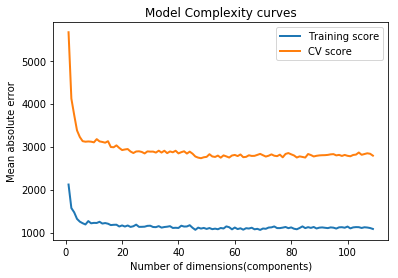

In [4]:
#Deprecated
from IPython.display import Image
img = Image('../plots/model-complexity.png')
display(img)

Here, you can see the results of the algorithm showing how much of the variance remains after pca reduction

In [5]:
pca = PCA()
pca.fit(X_train_ssdum)
for dimension in range(X_train_ssdum.shape[1]):
    variance = pca.explained_variance_ratio_[:dimension].sum() * 100.0
    print("PCA with %d components retains: %.3f of variance" % (dimension,variance))

PCA with 0 components retains: 0.000 of variance
PCA with 1 components retains: 23.504 of variance
PCA with 2 components retains: 36.152 of variance
PCA with 3 components retains: 46.208 of variance
PCA with 4 components retains: 50.820 of variance
PCA with 5 components retains: 55.301 of variance
PCA with 6 components retains: 58.417 of variance
PCA with 7 components retains: 61.331 of variance
PCA with 8 components retains: 63.817 of variance
PCA with 9 components retains: 66.044 of variance
PCA with 10 components retains: 68.027 of variance
PCA with 11 components retains: 69.781 of variance
PCA with 12 components retains: 71.413 of variance
PCA with 13 components retains: 73.001 of variance
PCA with 14 components retains: 74.360 of variance
PCA with 15 components retains: 75.677 of variance
PCA with 16 components retains: 76.899 of variance
PCA with 17 components retains: 77.945 of variance
PCA with 18 components retains: 78.912 of variance
PCA with 19 components retains: 79.855 of 

We can see that 99 per cent of variance retains if we reduce dimensions to 255 components via PCA. Which is good, considering my algorithm works a little slow on server. And lastly I want to see performance on cross-validation of reduced data and usual data. And if accuracy remains approximately same or even gets better than without PCA (that happens when data is too noicy), I am going to use it.

In [6]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
X_train_dum,X_test_dum = df_utils.make_dummies(X_train,X_test)
scores_without_pca = cross_val_score(forest,X_train_dum,y_train,scoring='neg_mean_absolute_error',cv=3)
print("Cross-Validation score on data without dimensionality reduction is %.3f" % scores_without_pca.mean())

Cross-Validation score on data without dimensionality reduction is -2013.838


In [7]:
forest_pca = RandomForestRegressor()
pca = PCA(n_components=255)
pca.fit(X_train_ssdum)
X_train_pca = pca.fit_transform(X_train_ssdum)
X_test_pca = pca.transform(X_test_ssdum)
scores_pca = cross_val_score(forest_pca,X_train_pca,y_train,scoring='neg_mean_absolute_error',cv=3)
print("Cross-Validation score on data with PCA with 255 components is %.3f" %scores_pca.mean())

Cross-Validation score on data with PCA with 255 components is -2530.493


I am losing my accuracy after PCA implementation and for me accuracy is more important, than waiting time for a prediction. So, I will leave it as it is.